In [286]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [287]:
def halfmoon(rad, width, d, n_sample):

  if rad < width/2:
    print('The radius should be at least larger than half the width')

  elif (n_sample % 2) != 0:
    print('Please make sure the number of samples is even')

  else:
    print('Halfmoon')

  aa = np.random.rand(2 ,n_sample//2)
  radius = (rad - width/2) + width*aa[0,:]
  theta = np.pi * aa[1,:]

  x = np.multiply(radius,np.cos(theta))
  y = np.multiply(radius,np.sin(theta))
  label = 1 * np.ones(1 * len(x))

  x1 = np.multiply(radius, np.cos(-theta)) + rad
  y1 = np.multiply(radius,np.sin(-theta)) - d
  label1 = -1 * np.ones(1 * len(x1))
 
  xy = np.array([x,y,label])
  x1y1 = np.array([x1,y1,label1])

  data = np.concatenate((xy, x1y1), axis=1)

  data_shuffled = data[:, np.random.permutation(data.shape[1])]

  return data ,data_shuffled.T
  

In [288]:
#Generate Halfmoon data
rad = 16 # radius of the halfmoon
width = 6 # width of the halfmoon
d = 0 # distance between two halfmoon
num_tr = 1000 # training data
num_ts = 2000 # testing data
num_sample = num_tr + num_ts # total number of data
[data, data_shuffled] = halfmoon(rad,width,d,num_sample)

Halfmoon


In [289]:
print(data_shuffled)
print(data_shuffled.shape)

[[ -0.99458331  -3.97691777  -1.        ]
 [ 32.12855392  -9.00075365  -1.        ]
 [  7.99951411  14.55843226   1.        ]
 ...
 [  1.53585178  17.23189354   1.        ]
 [ -4.05980505  12.83088691   1.        ]
 [-13.22878642  12.99580568   1.        ]]
(3000, 3)


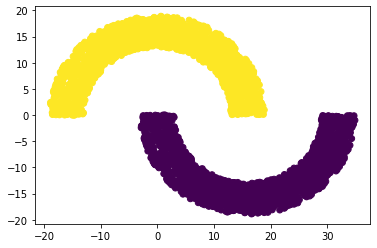

In [290]:
# plot halfmoon data 
plt.scatter(data[0,:], data[1,:],c = data[2,:])
plt.show() 

In [291]:
def Perceptron_Train(x,y,eta,w,epochs):
  # Activation and Actual response
  print("Train the Perceptron")
  print("--------------------")
  
  # Number of passes for a training data
  for epoch in range(epochs):
    error = []
    mse = []

    for i in range(len(x)):
      X = x[i:i+1,:]
      y_ = np.dot(X,w)

      # Predicted value of output
      ypred = np.tanh(y_)

      # print('predicted',ypred)
      # print('actual',y[i:i+1])

      # Error
      ee = np.subtract(y[i:i+1],ypred) 
      
      #Equation for update weight 
      w_updated = w + eta * X.T * ee
      w = w_updated
      
      error.append(ee)

    # Mean-Square-Error  
    square_array = np.square(error)
    e = square_array.mean() 
    mse.append(e)
    print('Epoch: ',epoch+1 ,'MSE: %.2f '%(e)) 

  return w, mse

In [292]:
x = data_shuffled[:,0:2]
y = data_shuffled[:,2:]

#Initialize the Perceptron Network
num_in = 2
eta = 0.1
w = np.zeros((num_in,1),dtype=float)
epochs = 100

trained_weight, Mse_train  = Perceptron_Train(x,y,eta,w,epochs)

Train the Perceptron
--------------------
Epoch:  1 MSE: 0.06 
Epoch:  2 MSE: 0.03 
Epoch:  3 MSE: 0.03 
Epoch:  4 MSE: 0.04 
Epoch:  5 MSE: 0.03 
Epoch:  6 MSE: 0.04 
Epoch:  7 MSE: 0.03 
Epoch:  8 MSE: 0.03 
Epoch:  9 MSE: 0.01 
Epoch:  10 MSE: 0.02 
Epoch:  11 MSE: 0.03 
Epoch:  12 MSE: 0.03 
Epoch:  13 MSE: 0.04 
Epoch:  14 MSE: 0.01 
Epoch:  15 MSE: 0.01 
Epoch:  16 MSE: 0.01 
Epoch:  17 MSE: 0.01 
Epoch:  18 MSE: 0.02 
Epoch:  19 MSE: 0.03 
Epoch:  20 MSE: 0.03 
Epoch:  21 MSE: 0.03 
Epoch:  22 MSE: 0.03 
Epoch:  23 MSE: 0.03 
Epoch:  24 MSE: 0.02 
Epoch:  25 MSE: 0.01 
Epoch:  26 MSE: 0.00 
Epoch:  27 MSE: 0.00 
Epoch:  28 MSE: 0.00 
Epoch:  29 MSE: 0.00 
Epoch:  30 MSE: 0.00 
Epoch:  31 MSE: 0.00 
Epoch:  32 MSE: 0.00 
Epoch:  33 MSE: 0.00 
Epoch:  34 MSE: 0.00 
Epoch:  35 MSE: 0.00 
Epoch:  36 MSE: 0.00 
Epoch:  37 MSE: 0.00 
Epoch:  38 MSE: 0.00 
Epoch:  39 MSE: 0.00 
Epoch:  40 MSE: 0.00 
Epoch:  41 MSE: 0.00 
Epoch:  42 MSE: 0.00 
Epoch:  43 MSE: 0.00 
Epoch:  44 MSE: 0.00 

In [293]:
def Perceptron_Test(x,y,eta,w):
  print("Test the Perceptron")
  print("-------------------")
  
  error = []
  mse = []

  for i in range(len(x)):
      X = x[i:i+1,:]
      y_ = np.dot(X,w)
      ypred = np.sign(y_)

      #print('predicted',ypred)
      #print('actual',y[i:i+1])

      ee = np.subtract(y[i:i+1],ypred)        
      error.append(ee)

  square_array = np.square(error)
  e = np.mean(square_array) 
  mse.append(e)
  print('MSE: %.2f' %(e))
    
  return w, mse

In [294]:
Test_weight, MSE_Test = Perceptron_Test(x,y,eta,trained_weight)

Test the Perceptron
-------------------
MSE: 0.00
